In [132]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## DATA ANALYSIS

In [133]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")
label = 'SalePrice'

In [134]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
train_df.drop('Id', axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Based on info, there are 3 types of features: float64 and int64 (numerical) and objects (categorical)

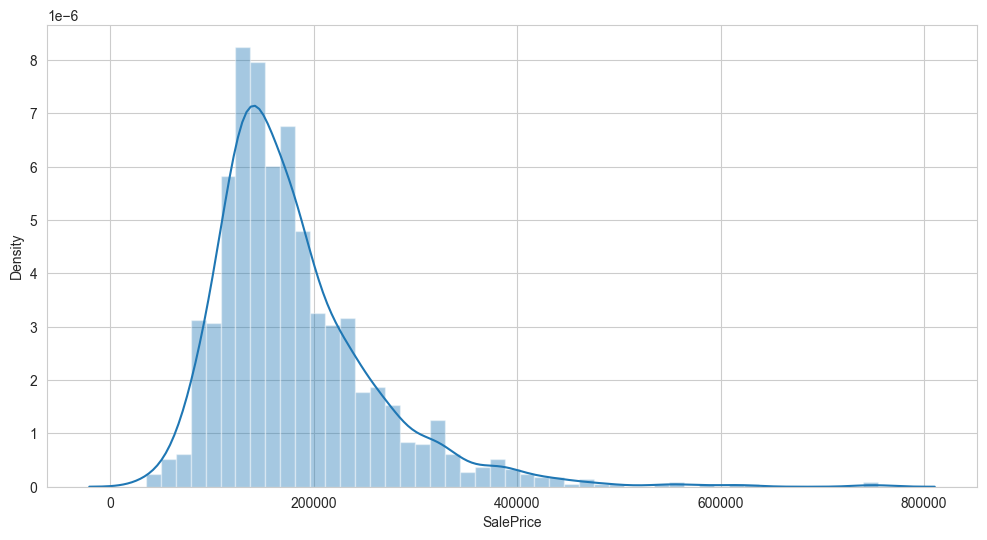

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [136]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.distplot(train_df[label])
plt.show()

train_df[label].describe()

### NUMERICAL COLUMNS

In [137]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
df_num = train_df[numerical_columns]
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


de 81 colunas, reduzimos para 37

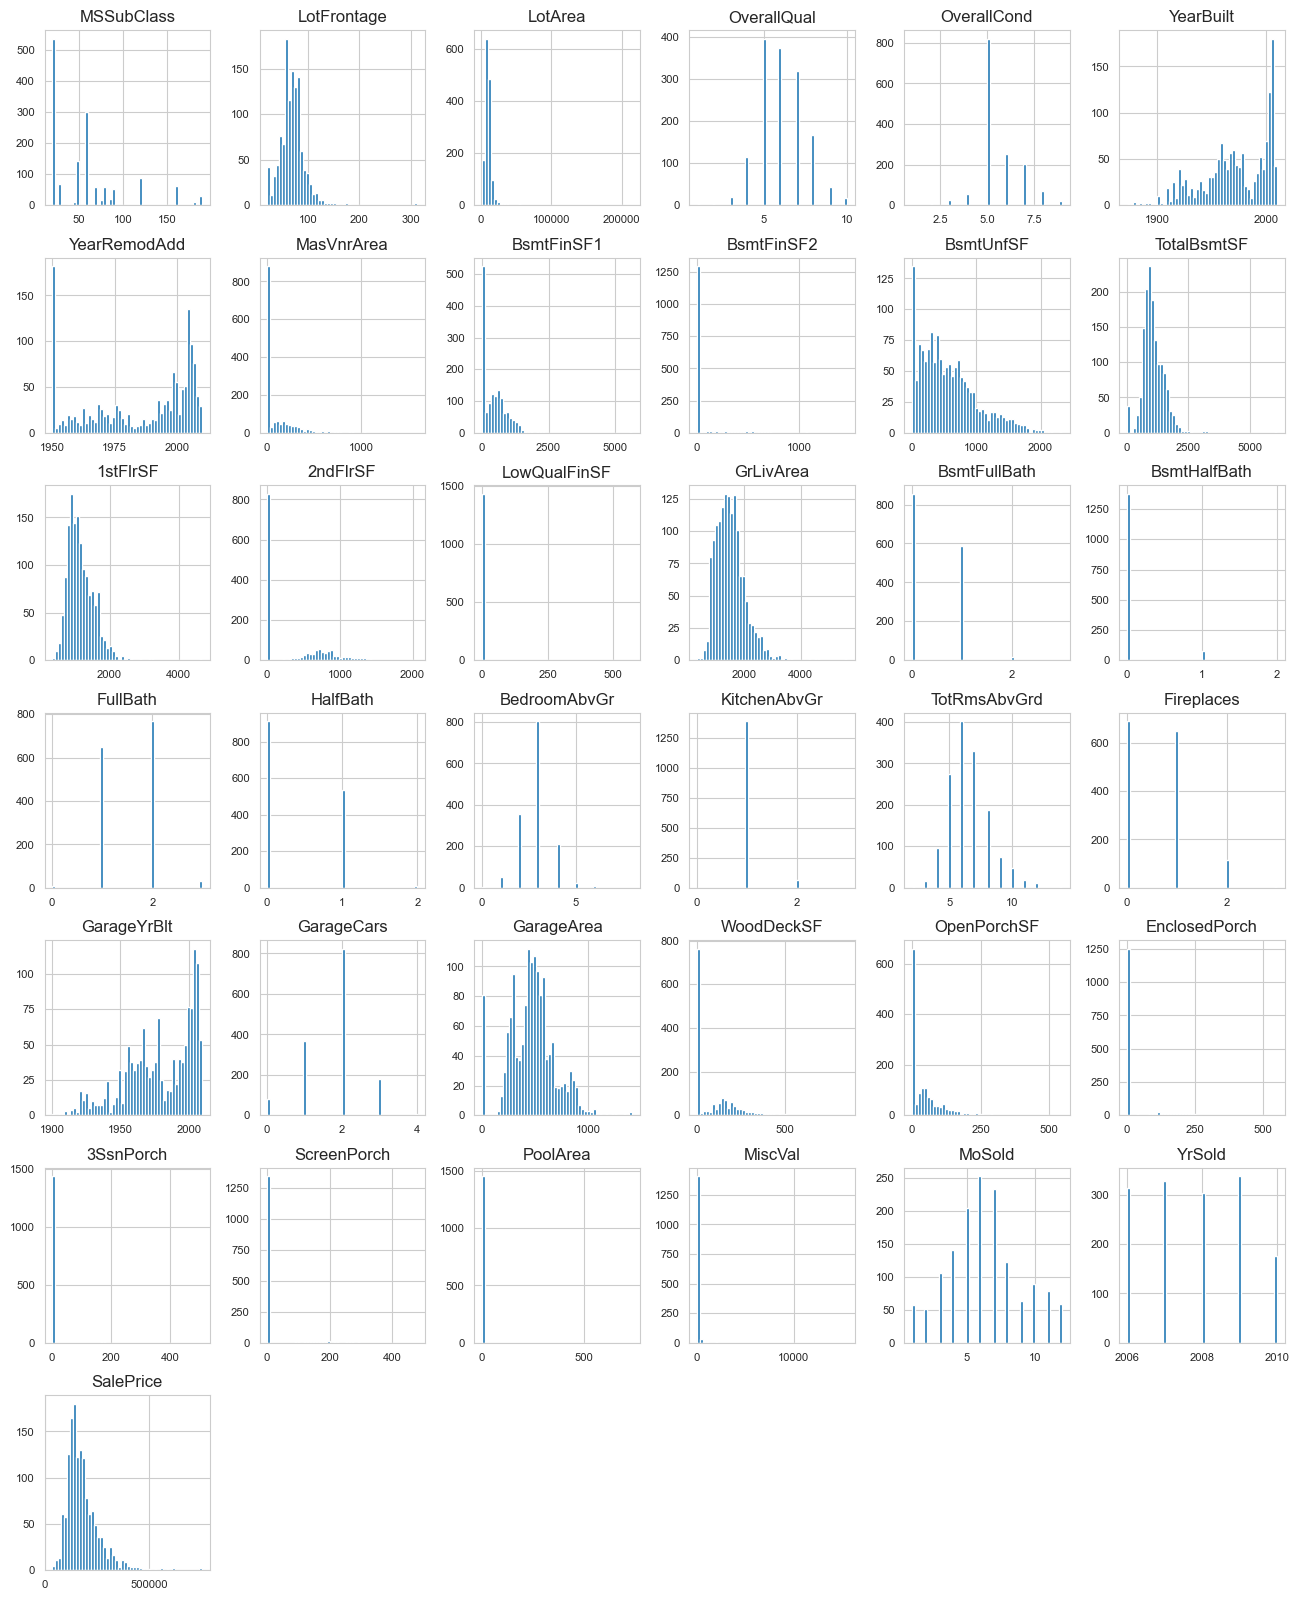

In [138]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

## PREPARE DATASET

#### First we will split the train dataset into train and validation datasets

In [139]:
import numpy as np

print(f'Shape of initial data: {train_df.shape}')
train_df, valid_df = np.split(train_df, [int(0.7 * len(train_df))])
print(f'Shape of training data: {train_df.shape}')
print(f'Shape of validation data: {valid_df.shape}')

Shape of initial data: (1460, 80)
Shape of training data: (1021, 80)
Shape of validation data: (439, 80)


#### By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task as a parameter here

In [140]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label, task=tfdf.keras.Task.REGRESSION)

#### Check all models available

In [141]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

#### benchmark_rank1: Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time. 
Source: [tensorflow docs](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)

In [142]:
model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
model.compile(metrics=['mse'])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /var/folders/77/x5bdxswj42g15hjcw4d35qk40000gn/T/tmplex257hl as temporary training directory


In [143]:
model.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:00.376781. Found 1021 examples.
Training model...


I0000 00:00:1724779762.687638 5536605 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1724779762.687656 5536605 kernel.cc:775] Collect training examples
I0000 00:00:1724779762.687660 5536605 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1724779762.687856 5536605 kernel.cc:394] Number of batches: 2
I0000 00:00:1724779762.687861 5536605 kernel.cc:395] Number of examples: 1021
I0000 00:00:1724779762.688852 5536605 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1724779762.688870 5536605 data_spec_inference.cc:306] 2 item(s) have been prun

Model trained in 0:00:01.356063
Compiling model...


I0000 00:00:1724779764.025835 5536605 decision_forest.cc:761] Model loaded with 300 root(s), 97310 node(s), and 74 input feature(s).
I0000 00:00:1724779764.025873 5536605 abstract_model.cc:1323] Engine "RandomForestGeneric" built
2024-08-27 14:29:24.025885: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


In [144]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1021, accuracy=None, loss=None, rmse=29060.37394434026, ndcg=None, aucs=None, auuc=None, qini=None)

In [145]:
evaluation = model.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 178ms/step - loss: 0.0000e+00 - mse: 1037441024.0000
loss: 0.0000
mse: 1037441024.0000


## INFER

In [162]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.REGRESSION)

predicted = model.predict(test_ds).flatten()
actual = pd.read_csv("dataset/sample_submission.csv")

print(predicted.shape)
print(actual[label].shape)

2/2 [==============================] - 0s 24ms/step
(1459,)
(1459,)


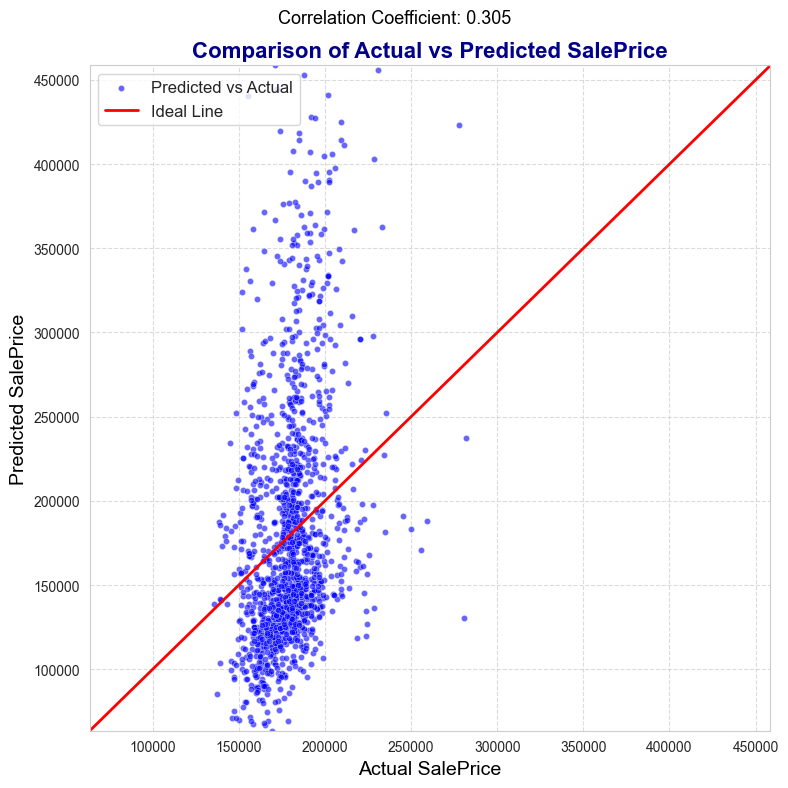

In [163]:
correlation = np.corrcoef(actual[label], predicted)[0, 1]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 8))

sns.scatterplot(x=actual[label], y=predicted, color='blue', alpha=0.6, s=20, label='Predicted vs Actual')

max_value = max(actual[label].max(), predicted.max())
min_value = min(actual[label].min(), predicted.min())

sns.lineplot(x=[min_value, max_value], y=[min_value, max_value], color='red', linewidth=2, label='Ideal Line')

plt.title('Comparison of Actual vs Predicted SalePrice', fontsize=16, fontweight='bold', color='darkblue')
subtitle = 'Correlation Coefficient: {:.3f}'.format(correlation)
plt.suptitle(subtitle, fontsize=13, color='black')
plt.xlabel('Actual SalePrice', fontsize=14, color='black')
plt.ylabel('Predicted SalePrice', fontsize=14, color='black')

plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [164]:
predicted_df = pd.DataFrame({'Id': test_df['Id'], 'True Sale Price': actual['SalePrice'] ,'Predicted Sale Price': predicted})
predicted_df = predicted_df.round(2)
predicted_df.head(10)

,Id,True Sale Price,Predicted Sale Price
0,1461,169277.05,125961.796875
1,1462,187758.39,151446.078125
2,1463,183583.68,183962.640625
3,1464,179317.48,186058.656250
4,1465,150730.08,192579.578125
5,1466,177150.99,181985.203125
6,1467,172070.66,174175.125000
7,1468,175110.96,174292.203125
8,1469,162011.70,180077.765625
9,1470,160726.25,125258.171875
